In [61]:
import pandas as pd

#as vezes precisaremos mudar o encoding. Possiveis valores para testar:
#encoding='Latin1', encoding='ISO-8859-1', encoding='utf-8' e encoding='cp1252'
#o encoding vai em um dos parametros do read_csv
vendas_df = pd.read_csv(r'D:\Banco de Dados\Contoso\Contoso - Vendas  - 2017.csv', sep=';',encoding='utf-8')
produtos_df = pd.read_csv(r'D:\Banco de Dados\Contoso\Contoso - Cadastro Produtos.csv', sep=';')
clientes_df = pd.read_csv(r'D:\Banco de Dados\Contoso\Contoso - Clientes.csv', sep=';')
lojas_df = pd.read_csv(r'D:\Banco de Dados\Contoso\Contoso - Lojas.csv', sep=';')
promocoes_df = pd.read_csv(r'D:\Banco de Dados\Contoso\Contoso - Promocoes.csv', sep=';')

produtos_df = produtos_df[['ID Produto','Nome do Produto']]
produtos_qty = vendas_df[['ID Cliente','Quantidade Vendida','Quantidade Devolvida']]
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
lojas_df = lojas_df[['ID Loja','Nome da Loja']]

vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')
vendas_df = vendas_df.rename(columns={'E-mail':'E-mail do cliente'})
vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'],format='%d/%m/%Y')
vendas_df['Data do Envio'] = pd.to_datetime(vendas_df['Data do Envio'],format='%d/%m/%Y')
vendas_df['Ano Venda'] = vendas_df['Data da Venda'].dt.year
vendas_df['Mes Venda'] = vendas_df['Data da Venda'].dt.month
vendas_df
#vendas_df.info()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do cliente,Ano Venda,Mes Venda
0,1,2017-01-01,2017-01-02,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp,2017,1
1,880458,2017-11-23,2017-11-23,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp,2017,11
2,191019,2017-03-20,2017-03-21,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp,2017,3
3,18610,2017-01-08,2017-01-10,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp,2017,1
4,287704,2017-04-23,2017-04-26,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,2017-11-23,2017-11-23,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com,2017,11
980638,920243,2017-12-09,2017-12-10,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com,2017,12
980639,467482,2017-06-21,2017-06-25,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net,2017,6
980640,853643,2017-11-13,2017-11-20,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com,2017,11


,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


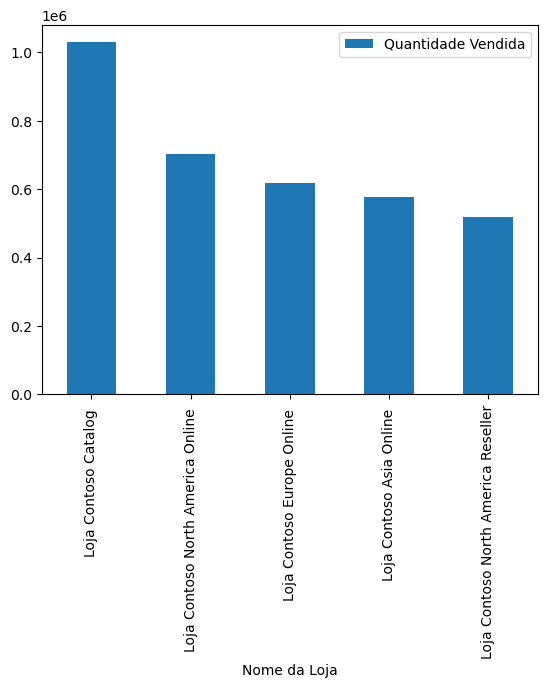

In [62]:
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida',ascending=False)
vendas_lojas[:5].plot(kind='bar')
vendas_lojas

In [63]:
#Qual percentual das vendas devolvido?

total_devolvido = vendas_df['Quantidade Devolvida'].sum()
total_vendido = vendas_df['Quantidade Vendida'].sum()
#percentual_devolvido = total_devolvido / total_vendido
print('{:.2%}'.format(total_devolvido / total_vendido))

1.17%


In [64]:
#Filtrar lojas
vendas_contoso_europe = vendas_df[vendas_df['ID Loja'] == 306]
total_devolvido = vendas_contoso_europe['Quantidade Devolvida'].sum()
total_vendido = vendas_contoso_europe['Quantidade Vendida'].sum()
#percentual_devolvido = total_devolvido / total_vendido
print('{:.2%}'.format(total_devolvido / total_vendido))

1.33%


In [65]:
loja306 = vendas_df[(vendas_df['ID Loja'] == 306) & (vendas_df['Quantidade Devolvida'] == 0)]
display(loja306)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do cliente,Ano Venda,Mes Venda
1,880458,2017-11-23,2017-11-23,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp,2017,11
17,614980,2017-08-18,2017-08-18,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com,2017,8
18,786402,2017-10-21,2017-10-25,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com,2017,10
19,383897,2017-05-25,2017-05-28,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com,2017,5
77,559478,2017-07-26,2017-07-29,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com,2017,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,2017-11-18,2017-11-24,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com,2017,11
885356,907944,2017-12-04,2017-12-04,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org,2017,12
885386,919123,2017-12-08,2017-12-08,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com,2017,12
885390,964452,2017-12-25,2017-12-25,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com,2017,12


In [66]:
#Quantidade de produtos vendidos que não houve devolução
vendas_sem_devolucao = loja306['Quantidade Vendida'].sum()
vendas_sem_devolucao

481657

,Quantidade Vendida
Mes Venda,
1,794361
2,798324
3,781069
4,1061955
5,1091185
6,1069735
7,1029201
8,966733
9,947425


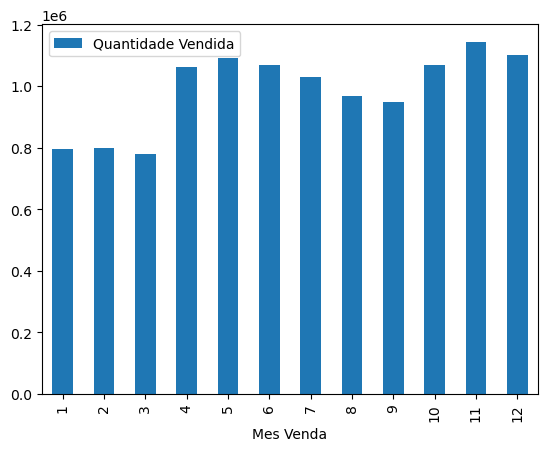

In [71]:
vendas_ano = vendas_df.groupby('Mes Venda').sum()
vendas_ano = vendas_ano[['Quantidade Vendida']]
vendas_ano.plot(kind='bar')
vendas_ano

In [75]:
loja306 = vendas_df[vendas_df['Mes Venda'] == 8]
loja306

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do cliente,Ano Venda,Mes Venda
15,638297,2017-08-27,2017-08-27,0,262,356,1,6825,10,0,Fabrikam Laptop14.1W M4180 Red,Loja Contoso Bangkok No.1,rbrumfieldmy@ameblo.jp,2017,8
17,614980,2017-08-18,2017-08-18,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com,2017,8
20,645873,2017-08-31,2017-08-31,0,309,968,9,21344,9,1,A. Datum Bridge Digital Camera M300 Grey,Loja Contoso Europe Reseller,makayla3@adventure-works.com,2017,8
32,577591,2017-08-03,2017-08-05,2,79,1272,3,21344,6,0,Contoso Lens Cap Keeper E314 White,Loja Contoso Baytown,makayla3@adventure-works.com,2017,8
37,583636,2017-08-05,2017-08-05,0,182,801,3,21344,6,0,Contoso Battery charger - bike E200 White,Loja Contoso Winchester,makayla3@adventure-works.com,2017,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980580,621713,2017-08-21,2017-08-25,4,187,1418,3,631,12,0,The Phone Company Touch Screen Phones SAW/On-w...,Loja Contoso Fredericksburg,jyendlehi@fotki.com,2017,8
980587,636814,2017-08-27,2017-09-05,9,244,846,9,928,4,0,Contoso Ultraportable Neoprene Sleeve E30 Black,Loja Contoso Ljubljana,mmacpheepr@lulu.com,2017,8
980588,616717,2017-08-19,2017-08-20,1,244,978,9,39376,9,0,A. Datum Super-zoom Digital Camera X300 Pink,Loja Contoso Ljubljana,carly1@adventure-works.com,2017,8
980594,614696,2017-08-18,2017-08-21,3,206,755,9,39281,4,0,Contoso Home/Office Laptop Power Adapter E300 ...,Loja Contoso Manchester,jade13@adventure-works.com,2017,8
